#Heart Failure Prediction


Import Libraries

In [ ]:
#shree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Import Dataset

In [ ]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Preprocessing

##Label Encoding

In [ ]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
features=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in features:
  data[feature]=le.fit_transform(data[feature])
data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
print(data.corr()["HeartDisease"].abs().sort_values(ascending=False))
# ('RestingBP', 'Cholesterol', 'Sex', 'FastingBS', 'ST_Slope')

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64


X Data

In [ ]:
x=data.iloc[:,:-1]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


##Scaling the data

In [ ]:
x_cont=x.iloc[:,[0,3,4,7,9]]
x_disc=x.iloc[:,[1,2,5,6,8,10]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_cont)
x_cont_scaler=scaler.transform(x_cont)
x_cont_scaler=pd.DataFrame(x_cont_scaler,columns=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'])
x_cont_scaler
x=pd.concat([x_cont_scaler,x_disc],axis=1)
x

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1,1,0,1,0,2
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,2,0,1,0,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1,1,0,2,0,2
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,0,0,1,1,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283,1,3,0,1,0,1
914,1.536902,0.627078,-0.053049,0.164684,2.357094,1,0,1,1,0,1
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283,1,0,0,1,1,1
916,0.370100,-0.129513,0.340275,1.461525,-0.832432,0,1,0,0,0,1


Y Data

In [ ]:
y=data.iloc[:,-1:]
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
x_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
392,0.794391,-0.129513,-1.818435,-0.857069,-0.832432,1,0,0,0,0,1
668,1.006537,0.410909,-0.034755,1.658016,-0.832432,0,1,0,1,0,2
828,0.476173,-0.237597,0.157334,-0.228298,1.231379,1,0,0,0,1,1
837,0.370100,0.951331,-0.281726,1.461525,0.668521,1,2,0,1,0,2
409,-0.054192,1.491752,-1.818435,-0.581981,-0.832432,1,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
66,-0.902775,-0.021428,0.898247,0.282579,-0.832432,0,0,0,1,0,2
880,-0.160265,2.140258,0.001833,0.989946,-0.363384,1,2,1,1,0,2
247,-0.584556,-0.561850,0.697011,0.518368,1.043759,1,0,1,2,1,0
182,-0.160265,0.410909,1.876984,-0.503385,1.043759,1,0,0,1,1,1


#Exploratory Data Analysis

##Heat Map of Correlation Coffecient

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

NameError: ignored

<Figure size 864x864 with 0 Axes>

##Visualize Continous Data

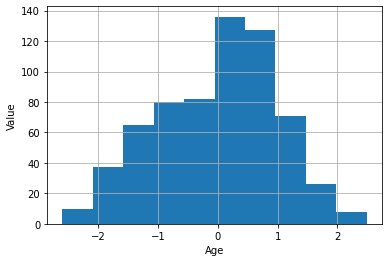

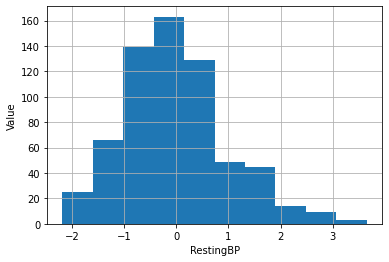

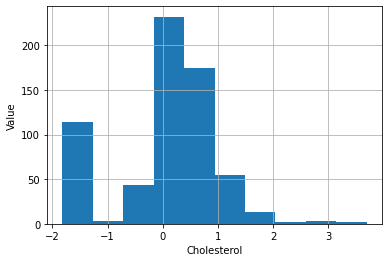

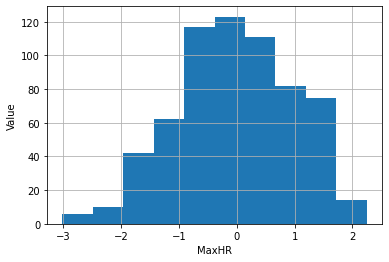

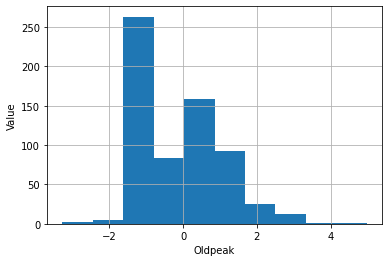

In [ ]:
import seaborn as sns
features_cont=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for feature in features_cont:
  x_train[feature].hist()
  plt.xlabel(feature)
  plt.ylabel("Value")
  plt.show()

Pair Plot of Continous Data

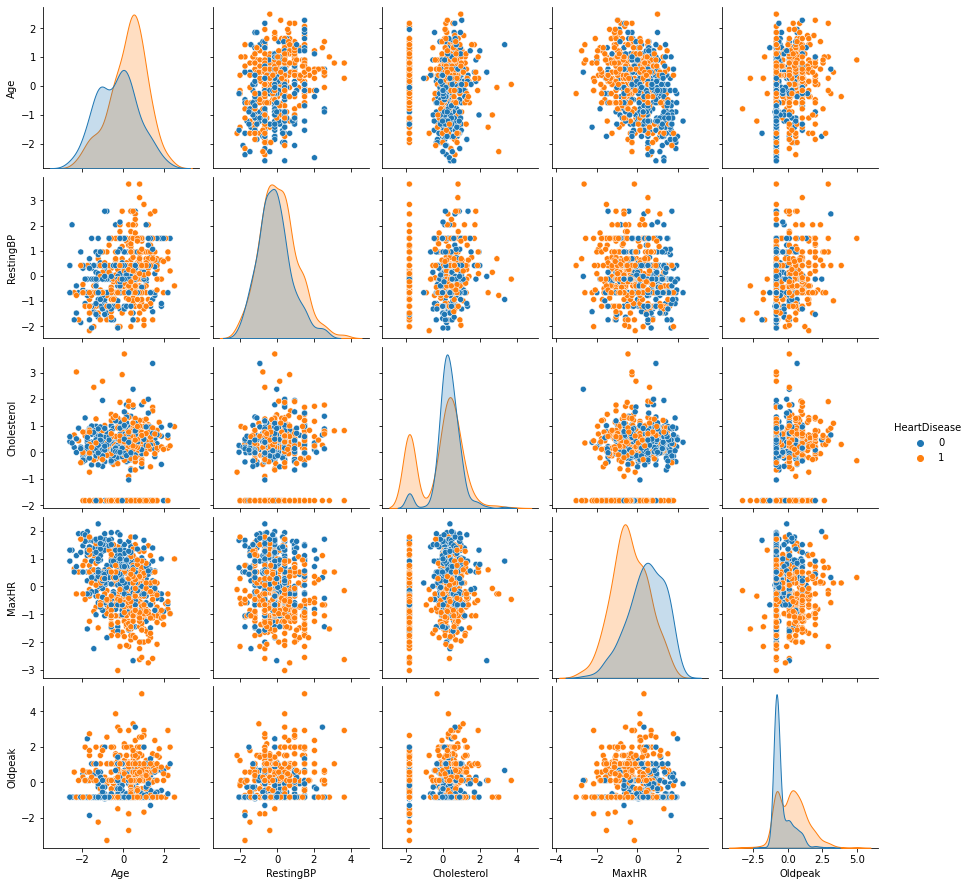

In [ ]:
sns.pairplot((pd.concat([x_train,y_train],axis=1)).iloc[:,[0,1,2,3,4,11]],hue='HeartDisease')

##Visualize Categorical Data

Analysis of Sex

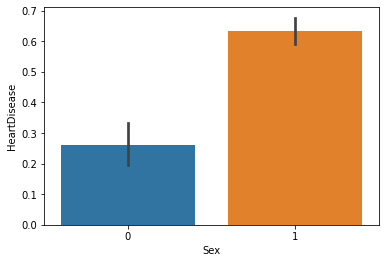

In [ ]:
sns.barplot(x_train["Sex"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["Sex"].unique())

[1 0]


Analysis of ChestPain Type

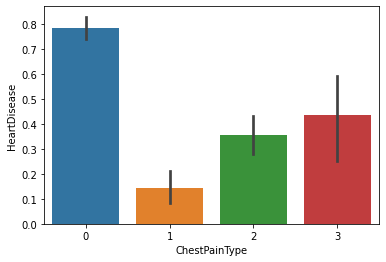

In [ ]:
sns.barplot(x_train["ChestPainType"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["ChestPainType"].unique())

[1 2 0 3]


Analysis of FastingBS

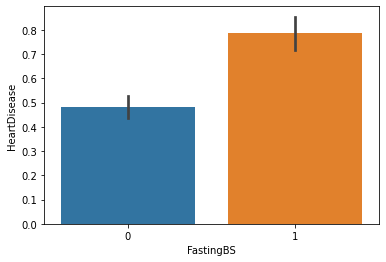

In [ ]:
sns.barplot(x_train["FastingBS"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["FastingBS"].unique())

[0 1]


Analysis of Resting ECG

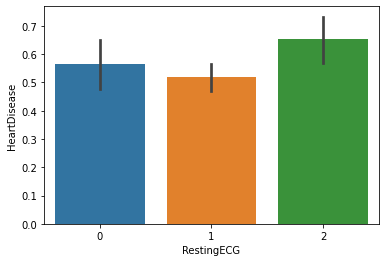

In [ ]:
sns.barplot(x_train["RestingECG"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["RestingECG"].unique())

[1 2 0]


Analysis of ExcersiseEngia

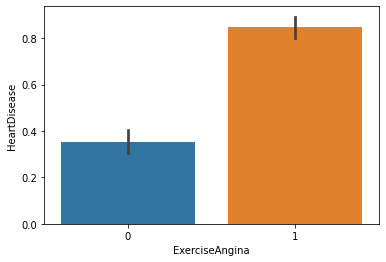

In [ ]:
sns.barplot(x_train["ExerciseAngina"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["ExerciseAngina"].unique())

[0 1]


Analysis of ST_Slope

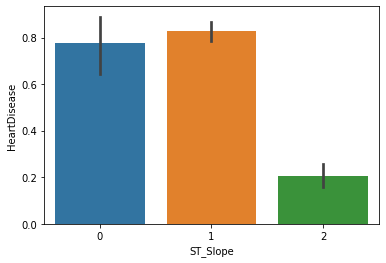

In [ ]:
sns.barplot(x_train["ST_Slope"],y_train["HeartDisease"])
plt.show()

In [ ]:
print(data["ST_Slope"].unique())

[2 1 0]


##Target Variable

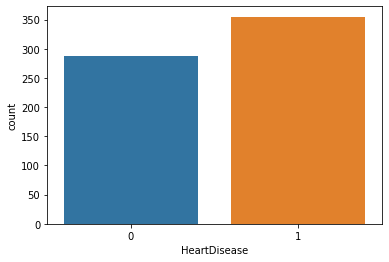

In [ ]:
sns.countplot(y_train['HeartDisease'])
plt.show()

In [ ]:
count=y_train.value_counts()

In [ ]:
count=np.array(count)

In [ ]:
print("Percentage of patience without heart problems: ",count[0]/(count[0]+count[1]))
print("Percentage of patience with heart problems: ",count[1]/(count[0]+count[1]))

Percentage of patience without heart problems:  0.5529595015576324
Percentage of patience with heart problems:  0.4470404984423676


#Algorithms






##Decision Tree

Import Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Tuning of hyperparameters

In [ ]:
def loss_func(confusion_mat):
  return (confusion_mat[1][0]*100)+confusion_mat[0][1]

In [ ]:
Criterion=['entropy','gini']
min_loss=1000000000
for info in Criterion:
  for i in range (5,15):
    for j in range (2,10):
      for k in range (2,20):
        cls=DecisionTreeClassifier(criterion=info, max_depth=i,max_leaf_nodes=2*k,min_samples_split=j,random_state=42)
        cls.fit(x_train,y_train)
        y_pred=cls.predict(x_test)
        x_pred=cls.predict(x_train)
        loss=loss_func(confusion_matrix(y_test,y_pred))
        if min_loss>loss_func(confusion_matrix(y_test,y_pred)):
          min_loss=loss
          print(info,i,j,k)

entropy 5 2 2
entropy 5 2 3
entropy 5 2 5
gini 5 2 5


In [ ]:
cls=DecisionTreeClassifier(criterion='gini', max_depth=5,max_leaf_nodes=10,min_samples_split=2,random_state=42)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
x_pred=cls.predict(x_train)
# loss=loss_func(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8152173913043478
[[ 84  39]
 [ 12 141]]
0.8468468468468469


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test=y_test.reshape((276,))

Plot Continous Data Original

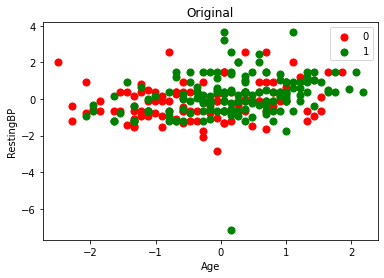

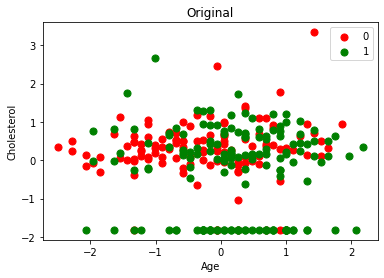

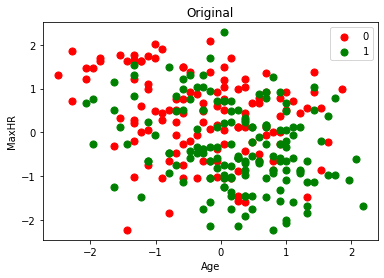

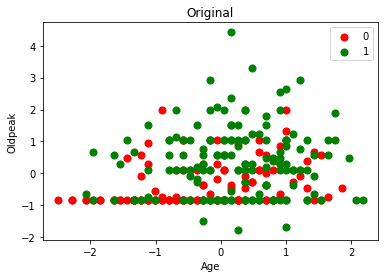

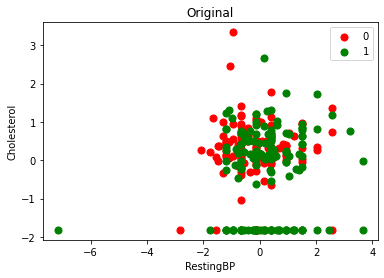

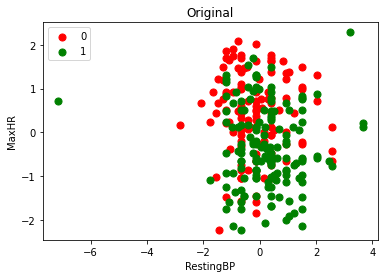

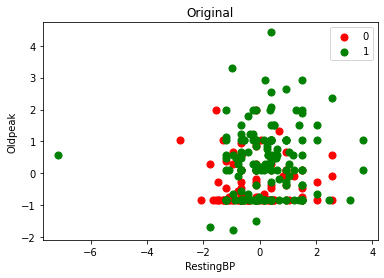

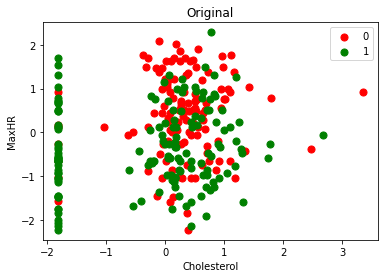

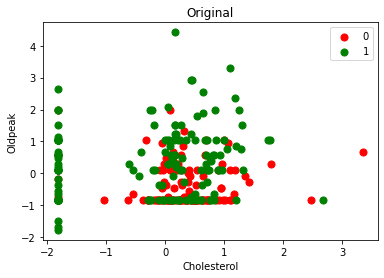

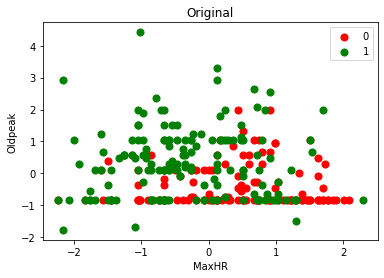

In [ ]:
feature_names=["Age",	"RestingBP",	"Cholesterol",	"MaxHR",	"Oldpeak"]
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_test==0,i],x_test[y_test==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_test==1,i],x_test[y_test==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Original')
    plt.show()

Plot of predicted Data

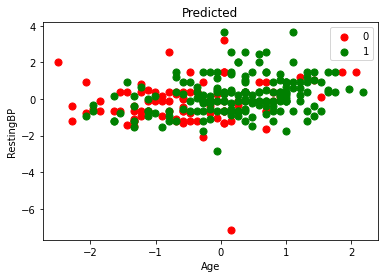

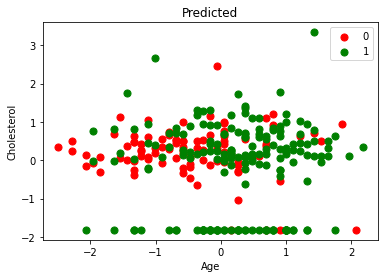

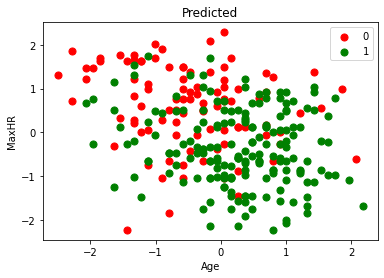

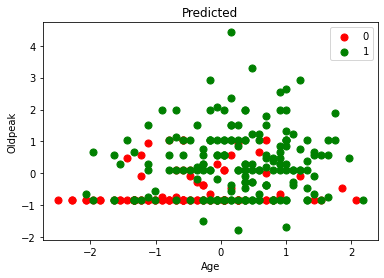

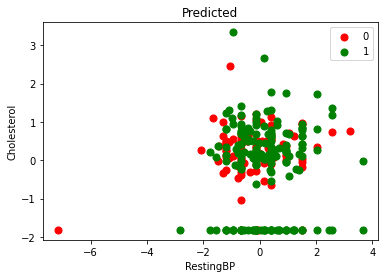

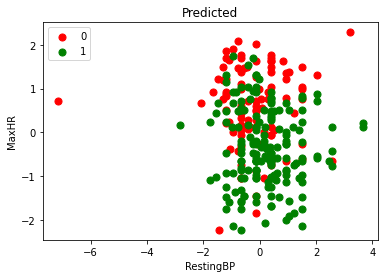

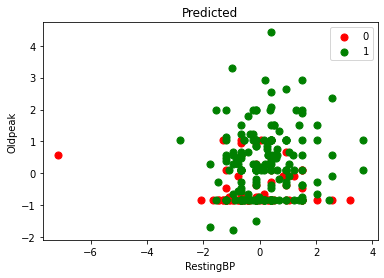

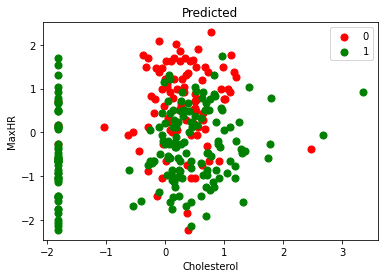

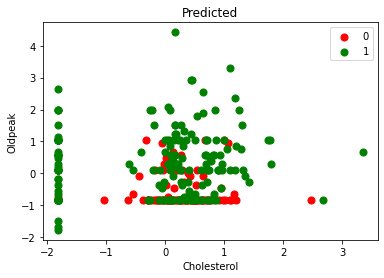

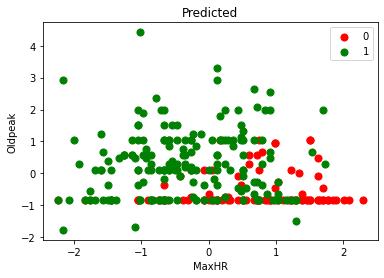

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_pred==0,i],x_test[y_pred==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_pred==1,i],x_test[y_pred==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Predicted')
    plt.show()

Five Fold Cross Validation: CV score

In [ ]:
x_test=pd.DataFrame(x_test)
y_test=pd.DataFrame(y_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train[train_index], x_train[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  cls=DecisionTreeClassifier(criterion='gini', max_depth=7,max_leaf_nodes=6,min_samples_split=8,random_state=42)
  cls.fit(X_train_,y_train_)
  y_pred_=cls.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.8527131782945736
Accuracy score of 2 is: 0.8604651162790697
Accuracy score of 3 is: 0.828125
Accuracy score of 4 is: 0.8125
Accuracy score of 5 is: 0.875
Avg. accuracy score: 0.8457606589147286


5-Fold Cross Validation

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(x_train,y_train)

predict_train = GNB.predict(x_train)
accuracy_train = accuracy_score(y_train,predict_train)
print("Train Accuracy:",accuracy_train)
predict_test = GNB.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_test)
print("Test Accuracy:",accuracy_test)
print(confusion_matrix(y_test,predict_test))
print(f1_score(y_test,predict_test))


Train Accuracy: 0.8722741433021807
Test Accuracy: 0.8079710144927537
[[ 90  33]
 [ 20 133]]
0.8338557993730408


Five Fold Cross Validation: CV score


In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  GNB = GaussianNB()
  GNB.fit(X_train_,y_train_)
  y_pred_=GNB.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.8294573643410853
Accuracy score of 2 is: 0.875968992248062
Accuracy score of 3 is: 0.84375
Accuracy score of 4 is: 0.8359375
Accuracy score of 5 is: 0.8515625
Avg. accuracy score: 0.8473352713178294


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test=y_test.reshape((276,))


Plot of predicted data

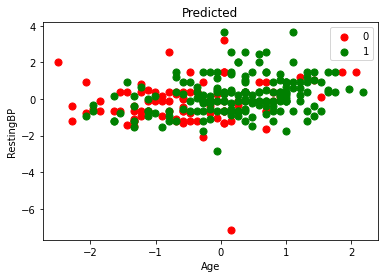

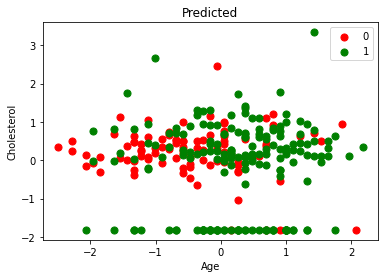

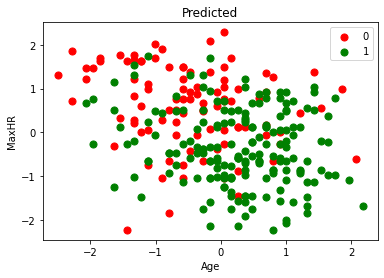

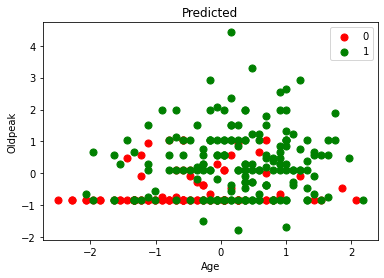

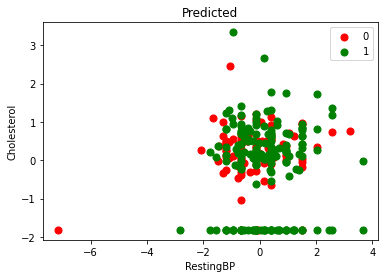

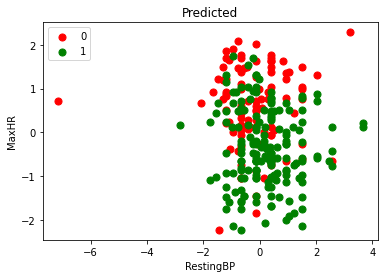

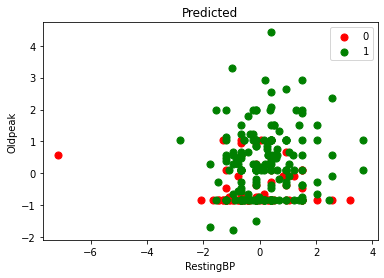

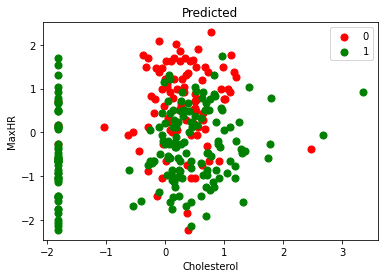

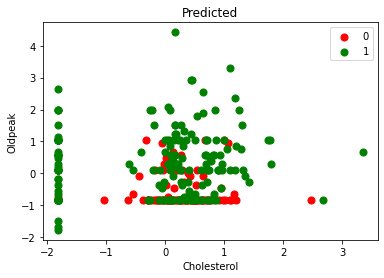

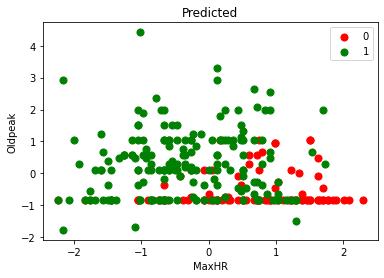

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_pred==0,i],x_test[y_pred==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_pred==1,i],x_test[y_pred==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Predicted')
    plt.show()

##K-Mean Clustering

Hyperparameter Tuning

In [ ]:
from sklearn.cluster import KMeans
min_loss=1000000000
for i in range(1,5):
  for j in range(0,100):
    kmean=KMeans(n_clusters=2,max_iter=100,n_init=10*i,random_state=j,tol=0.0001)
    kmean.fit(x_train)
    y_pred=kmean.predict(x_test)
    x_pred=kmean.predict(x_train)
    loss=loss_func(confusion_matrix(y_test,y_pred))
    if min_loss>loss_func(confusion_matrix(y_test,y_pred)):
      min_loss=loss
      print(i,j)
    # if (accuracy_score(y_test,y_pred)>0.8 and confusion_matrix(y_test,y_pred)[1][0]<20):
    #   print(i,j,end=' ')
    #   print(accuracy_score(y_test,y_pred),end=' ')
    #   print(confusion_matrix(y_test,y_pred)[1][0])

1 0
1 2
1 18


In [ ]:
kmean=KMeans(n_clusters=2,max_iter=100,n_init=10,random_state=18,tol=0.0001)
kmean.fit(x_train)
y_pred=kmean.predict(x_test)
x_pred=kmean.predict(x_train)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7789855072463768
[[ 94  29]
 [ 32 121]]
0.7986798679867987


Five Fold Cross Validation: CV score


In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  kmean=KMeans(n_clusters=2,max_iter=100,n_init=10,random_state=18,tol=0.0001)
  kmean.fit(X_train_,y_train_)
  y_pred_=kmean.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.1937984496124031
Accuracy score of 2 is: 0.8294573643410853
Accuracy score of 3 is: 0.78125
Accuracy score of 4 is: 0.7734375
Accuracy score of 5 is: 0.1640625
Avg. accuracy score: 0.5484011627906977


Plot of predicted Data

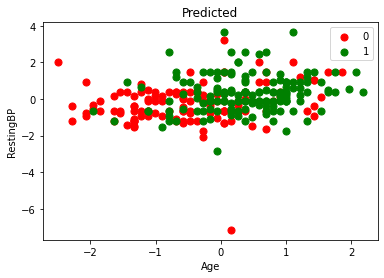

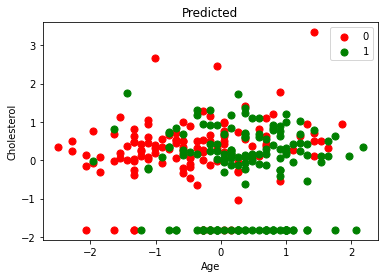

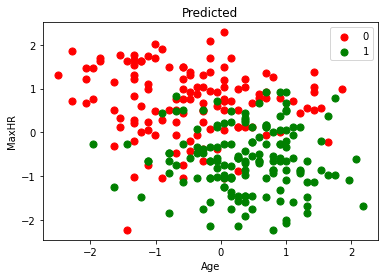

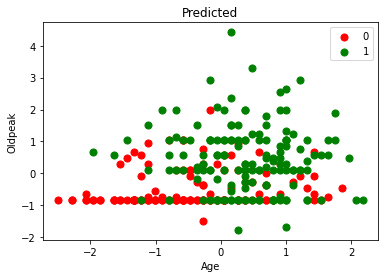

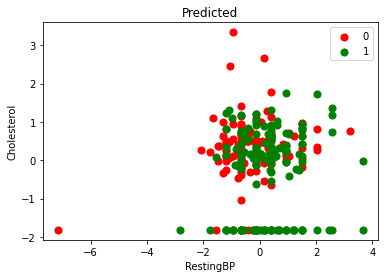

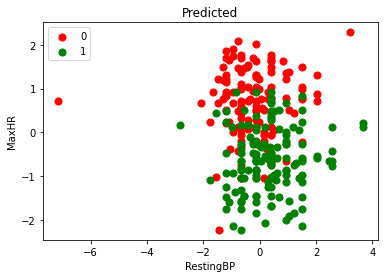

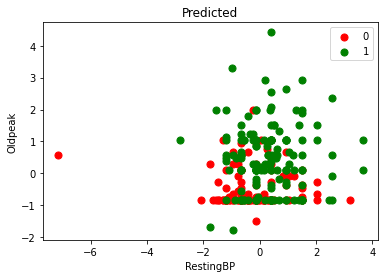

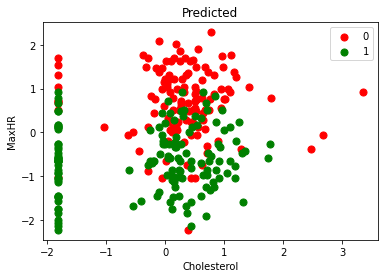

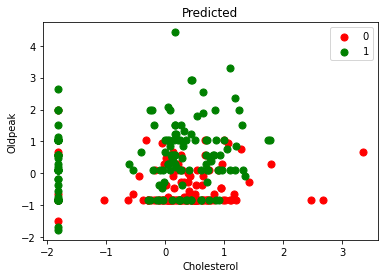

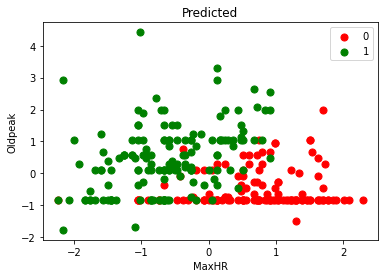

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_pred==0,i],x_test[y_pred==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_pred==1,i],x_test[y_pred==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Predicted')
    plt.show()

##Neural Networks: MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

Hyper-Parameter Tuning

In [ ]:
Activation_function=['identity','logistic','tanh','relu']
Solver=['sgd','adam','lbfgs']
false_negative_mlp=[] #list to store false negatives
test_Accu_mlp=[] #list to store test accuracies
train_Accu_mlp=[] #list to store train accuracies
for i in Activation_function:
  for j in Solver:
    for k in range(5,10):
      for l in range(5,10):
        clf = MLPClassifier(activation=i,solver=j,hidden_layer_sizes=(k, l), random_state=42)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        print(i,j,k,l,end=' ')
        print(accuracy_score(y_test,y_pred),end=' ')
        print(confusion_matrix(y_test,y_pred)[1][0])

identity sgd 5 5 0.8152173913043478 19
identity sgd 5 6 0.8188405797101449 19
identity sgd 5 7 0.8152173913043478 22
identity sgd 5 8 0.822463768115942 19
identity sgd 5 9 0.8152173913043478 20
identity sgd 6 5 0.8152173913043478 21
identity sgd 6 6 0.8115942028985508 22
identity sgd 6 7 0.8115942028985508 21
identity sgd 6 8 0.8079710144927537 20
identity sgd 6 9 0.8115942028985508 21
identity sgd 7 5 0.8007246376811594 22
identity sgd 7 6 0.8043478260869565 23
identity sgd 7 7 0.8043478260869565 24
identity sgd 7 8 0.7971014492753623 25
identity sgd 7 9 0.7971014492753623 22
identity sgd 8 5 0.8188405797101449 22
identity sgd 8 6 0.8115942028985508 21
identity sgd 8 7 0.8115942028985508 21
identity sgd 8 8 0.8115942028985508 22
identity sgd 8 9 0.8115942028985508 22
identity sgd 9 5 0.8007246376811594 23
identity sgd 9 6 0.7971014492753623 25
identity sgd 9 7 0.8152173913043478 20
identity sgd 9 8 0.8079710144927537 23
identity sgd 9 9 0.8115942028985508 22
identity adam 5 5 0.833333

In [ ]:
clf = MLPClassifier(activation='relu',solver='lbfgs',hidden_layer_sizes=(9, 7), random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8115942028985508
[[ 89  34]
 [ 18 135]]
0.8385093167701864


Five Fold Cross Validation: CV score


In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  clf = MLPClassifier(activation='relu',solver='lbfgs',hidden_layer_sizes=(9, 7), random_state=42)
  clf.fit(X_train_,y_train_)
  y_pred_=clf.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.8604651162790697
Accuracy score of 2 is: 0.8682170542635659
Accuracy score of 3 is: 0.828125
Accuracy score of 4 is: 0.7890625
Accuracy score of 5 is: 0.828125
Avg. accuracy score: 0.834798934108527


Plot of predicted Data

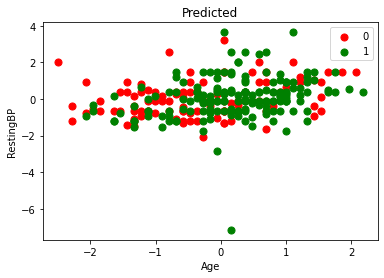

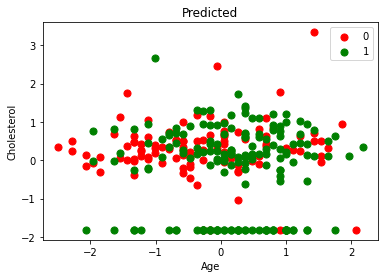

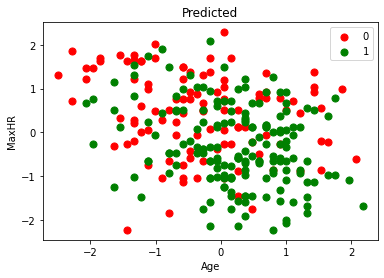

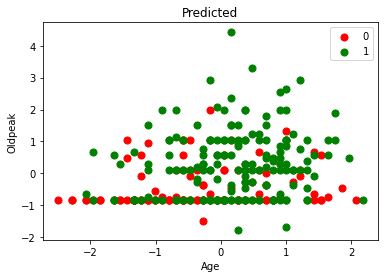

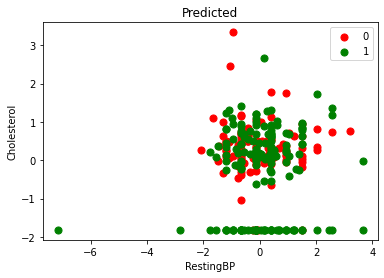

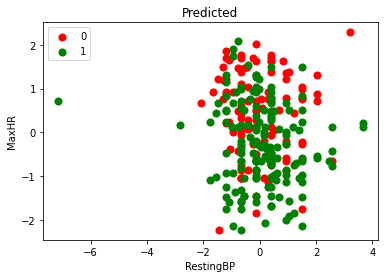

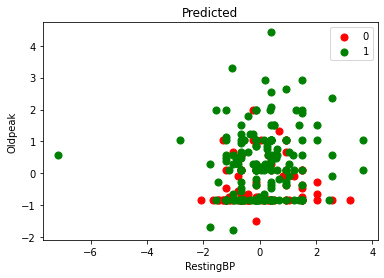

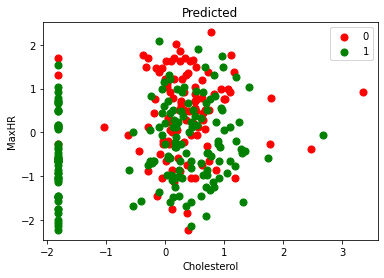

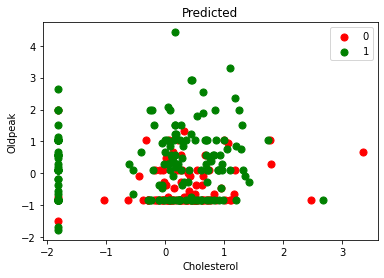

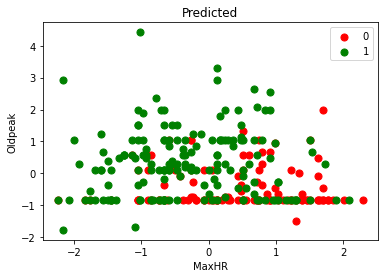

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_pred==0,i],x_test[y_pred==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_pred==1,i],x_test[y_pred==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Predicted')
    plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
min_loss=10000000
for i in range(0,50):
  for j in range(1,5):
    rf = RandomForestClassifier(random_state=i, n_jobs=-1, max_depth=6,n_estimators=100*j)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    # print(accuracy_score(y_test,y_pred),end=' ')
    # print(confusion_matrix(y_test,y_pred)[1][0])
    loss=loss_func(confusion_matrix(y_test,y_pred))
    if min_loss>loss_func(confusion_matrix(y_test,y_pred)):
      min_loss=loss
      print(i,j)

0 1
3 1
6 3
48 2


In [ ]:
rf = RandomForestClassifier(random_state=48, n_jobs=-1, max_depth=6,n_estimators=200)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

0.8442028985507246
[[ 91  32]
 [ 11 142]]
0.8685015290519879


Plot of predicted Data

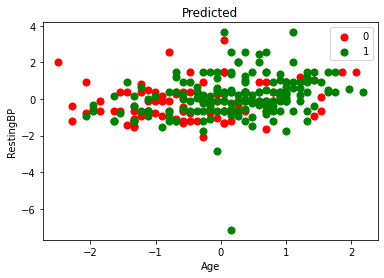

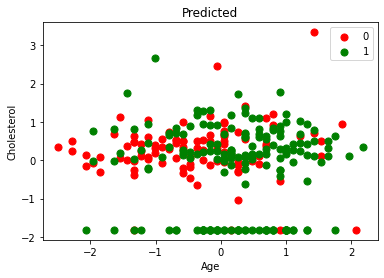

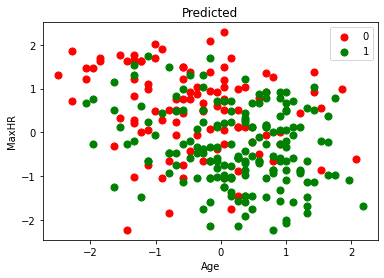

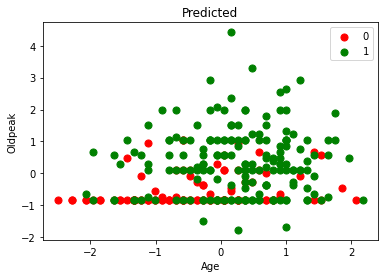

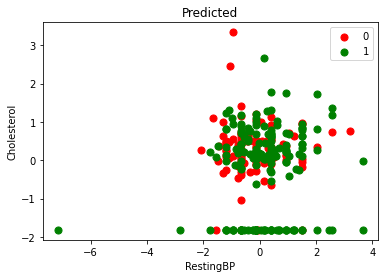

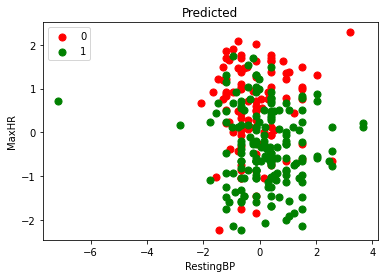

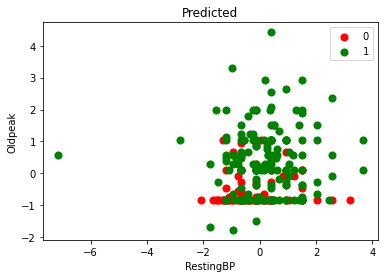

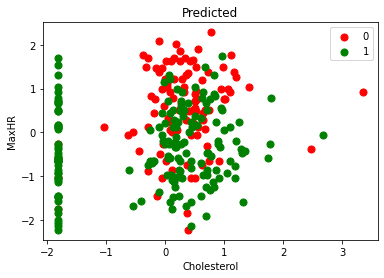

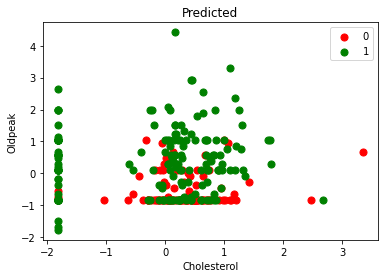

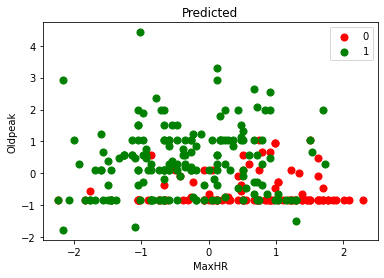

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    plt.scatter(x_test[y_pred==0,i],x_test[y_pred==0,j],s=50,c='red',label='0')
    plt.scatter(x_test[y_pred==1,i],x_test[y_pred==1,j],s=50,c='green',label='1')
    plt.legend()
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title('Predicted')
    plt.show()

Five Fold Cross Validation: CV score


In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train.iloc[train_index], x_train.iloc[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  rf = RandomForestClassifier(random_state=48, n_jobs=-1, max_depth=6,n_estimators=200)
  rf.fit(X_train_,y_train_)
  y_pred_=rf.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.8992248062015504
Accuracy score of 2 is: 0.9147286821705426
Accuracy score of 3 is: 0.84375
Accuracy score of 4 is: 0.859375
Accuracy score of 5 is: 0.890625
Avg. accuracy score: 0.8815406976744186


##XGBoost Classifier

Shallow

In [ ]:
x_train=np.array(x_train)

In [ ]:
import xgboost as xgb
min_loss=1000000000
for i in range(1,40):
  XGB = xgb.XGBClassifier(max_depth=2,learning_rate=0.01*i)
  XGB.fit(x_train,y_train)
  y_pred=XGB.predict(x_test)
  loss=loss_func(confusion_matrix(y_test,y_pred))
  if min_loss>loss_func(confusion_matrix(y_test,y_pred)):
    min_loss=loss
    print(i)
  # print(confusion_matrix(y_test,y_pred),i)


1
3
4
11
13
24


In [ ]:
XGB = xgb.XGBClassifier(max_depth=2,learning_rate=0.01*24)
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8478260869565217
[[ 95  28]
 [ 14 139]]


K-fold Cross Validation: CV score

In [ ]:
y_train

In [ ]:
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train[train_index], x_train[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  XGB = xgb.XGBClassifier(max_depth=2,learning_rate=0.01*24)
  XGB.fit(x_train,y_train)
  y_pred_=XGB.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 0.9534883720930233
Accuracy score of 2 is: 0.9767441860465116
Accuracy score of 3 is: 0.9296875
Accuracy score of 4 is: 0.9453125
Accuracy score of 5 is: 0.953125
Avg. accuracy score: 0.951671511627907


Deep

In [ ]:
import xgboost as xgb
min_loss=1000000000
for i in range(1,40):
  XGB = xgb.XGBClassifier(max_depth=12,learning_rate=0.01*i)
  XGB.fit(x_train,y_train)
  y_pred=XGB.predict(x_test)
  loss=loss_func(confusion_matrix(y_test,y_pred))
  if min_loss>loss_func(confusion_matrix(y_test,y_pred)):
    min_loss=loss
    print(i)
  # print(confusion_matrix(y_test,y_pred),i)


1
3
6
19


In [ ]:
x_test=np.array(x_test)

In [ ]:
XGB = xgb.XGBClassifier(max_depth=12,learning_rate=0.01*19)
XGB.fit(x_train,y_train)
y_pred=XGB.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8260869565217391
[[ 89  34]
 [ 14 139]]


K-fold Cross Validation: CV score

In [ ]:
k=0
arr=[]
for train_index, test_index in kf.split(x_train):
  k=k+1
  X_train_, X_test_ = x_train[train_index], x_train[test_index]
  y_train_, y_test_ = y_train.iloc[train_index], y_train.iloc[test_index]
  XGB = xgb.XGBClassifier(max_depth=12,learning_rate=0.01*19)
  XGB.fit(x_train,y_train)
  y_pred_=XGB.predict(X_test_)
  print('Accuracy score of',k,"is:", metrics.accuracy_score(y_test_, y_pred_))
  arr.append(metrics.accuracy_score(y_test_, y_pred_))

print("Avg. accuracy score: ",end="")
sum=0
for i in arr:
  sum=sum+i
  
print(sum/5)

Accuracy score of 1 is: 1.0
Accuracy score of 2 is: 1.0
Accuracy score of 3 is: 1.0
Accuracy score of 4 is: 1.0
Accuracy score of 5 is: 1.0
Avg. accuracy score: 1.0


#Result

In [ ]:
Accuarr=[81.52, 87.23, 77.90, 81.15, 84.42, 84.78, 82.6]
Model=["DTC",'Naive Bayes','K-Mean Clustering','MPl','Random Forest','XGB Shallow','XGB Deep']
FNR=[7.84,13.07,20.9,11.76,7.20,9.15,9.15]
FNR

[7.84, 13.07, 20.9, 11.76, 7.2, 9.15, 9.15]

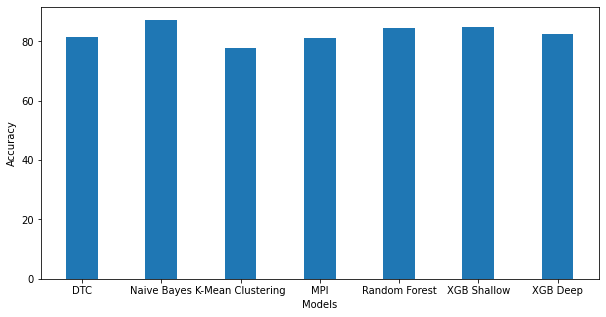

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Model,Accuarr ,width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")

plt.show()

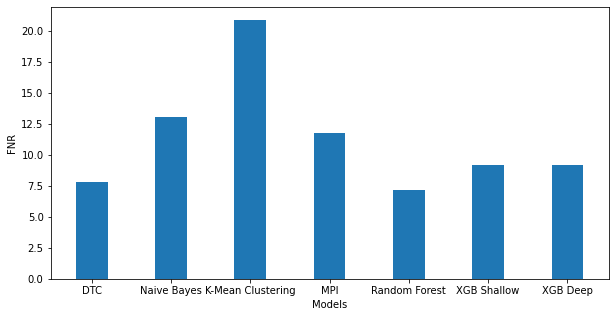

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Model,FNR ,width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("FNR")

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
